# 유사도(Similarity) 계산 방식
- 3.1 평균제곱차이 유사도(Mean Squared Difference Similarity)
- 3.2 코사인 유사도(Cosine Similarity)
- 3.3 피어슨 유사도(Pearson Similarity)

### 3.1 평균제곱차이 유사도(Mean Squared Difference Similarity)
- __User_based Collaborative Filter__ 경우
    - 사용자 _u_와 사용자 _v_간의 msd
    - 사용자 _u_와 사용자 _v_가 평가한 상품들의 평점간의 차의 제곱/ 사용자_u_와 사용자 _v_가 모두 평가한 상품들의 수
   
    $$
    msd(u,v) = \frac{1}{|I_{uv}|}\cdot\sum_{i\in_{I_{uv}}}({r_{ui} - r_{vi}})^2
    $$
    - $I_{uv}$는 사용자 $u$와 사용자 $v$ 모두에 의해 평가된 상품의 집합
    - $|I_{uv}|$는 사용자 $u$와 사용자 $v$ 모두에 의해 평가된 상품의 수
<br><br>
- __Item-based Collaborative Filter__ 경우
    - 상품 $i$와 상품$j$ 간의 msd
      $$
    msd(u,v) = \frac{1}{|I_{uv}|}\cdot\sum_{u\in_{U_{ij}}}({r_{ui} - r_{uj}})^2
    $$
    - 위 식에서 $U_{ij}$는 상품 $i$와 $j$모두를 평가한 사용자의 집합이고 $|U_{ij}|$는 상품 $i$와 상품$j$ 모두를 평가한 사용자의 수

# Mean Squared Diffrence Similarity
- Mean Squared Difference (msd)의 역수로 계산
- 차이가 클수록 Similarity 값은 작아진다!
- Mean Squared Difference Similarity 식에서는 MSD가 0이 되는 경우를 대응하기 위해 1을 무조건 더해줌
$$Msd Sim(u,v) = \frac{1}{msd(u,v) + 1}$$
$$Msd Sim(i,j) = \frac{1}{msd(i,j) + 1}$$

In [8]:
ratings={
     'Dave':{'달콤한인생':5,'범죄도시':3,'샤인':3},
     'David':{'달콤한인생':2,'범죄도시':1,'샤인':4},
     'Alex':{'범죄도시':4,'샤인':5},
     'Andy':{'달콤한인생':2,'범죄도시':1,'샤인':5}
}

In [22]:
def sim_msd(data , name1 , name2):
    sum = 0
    count = 0
    for movies in data[name1]:
        if movies in data[name2]: #같은 영화를 봤다면
            sum += pow(data[name1][movies]- data[name2][movies], 2)
            count += 1

    msd =  (sum / count)
    print('{}와 {}의 msd : {}'.format(name1, name2, msd))
    
    return 1 / ( msd  + 1)

In [23]:
sim_msd(ratings , 'Dave', 'Alex')

Dave와 Alex의 msd : 2.5


0.2857142857142857

### 3.2 코사인 유사도(Cosine Similarity)
- 설명은 생략

사용자 $u$와 사용자 $v$간의 Cosine Similarity : 두 사용자가 모두 평가한 상품의 평점을 사용해서 계산
$$ cosineSim(u,v) = \frac{\sum_{i\in{I_{uv}}}r_{ui}\cdot r_{vi}} {\sqrt{\sum_{i\in{I_{uv}}}{r_{ui}^2}}\cdot \sqrt{\sum_{i\in{I_{uv}}}{r_{vi}^2}}} $$

In [35]:
import math 
def sim_cosine(data , name1, name2):
    sum_name1 = 0
    sum_name2 = 0
    sum_name1_name2 = 0
    count = 0
    
    for movies in data[name1]:
        if movies in data[name2]: #같은 영화를 봤다면
            sum_name1 += pow(data[name1][movies], 2)
            sum_name2 += pow(data[name2][movies], 2)
            
            print('sum_name1 : {} \nsum_name2 : {}\n'.format(sum_name1, sum_name2))
            sum_name1_name2 += data[name1][movies]*data[name2][movies]

    return sum_name1_name2 / (math.sqrt(sum_name1)*math.sqrt(sum_name2))


In [36]:
sim_cosine(ratings, 'Dave','Alex')

sum_name1 : 9 
sum_name2 : 16

sum_name1 : 18 
sum_name2 : 41



0.9938837346736189

### 피어슨 유사도(Pearson Similarity)
- 두 벡터의 상관관계를 의미
- 유사도가 높을수록 1 , 가장 낮을 경우 -1의 값을 가짐

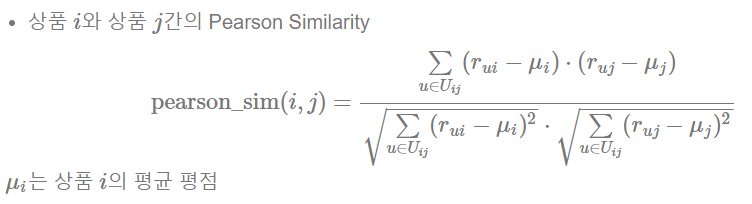

In [37]:
def sim_pearson(data, name1, name2):
    avg_name1 = 0
    avg_name2 = 0
    count = 0
    for movies in data[name1]:
        if movies in data[name2]: #같은 영화를 봤다면
            avg_name1 = data[name1][movies]
            avg_name2 = data[name2][movies]
            count += 1
    
    avg_name1 = avg_name1 / count
    avg_name2 = avg_name2 / count
    
    sum_name1 = 0
    sum_name2 = 0
    sum_name1_name2 = 0
    count = 0
    for movies in data[name1]:
        if movies in data[name2]: #같은 영화를 봤다면
            sum_name1 += pow(data[name1][movies] - avg_name1, 2)
            sum_name2 += pow(data[name2][movies] - avg_name2, 2)
            sum_name1_name2 += (data[name1][movies] - avg_name1) * (data[name2][movies] - avg_name2)
    
    return sum_name1_name2 / (math.sqrt(sum_name1)*math.sqrt(sum_name2))

In [40]:
sim_pearson(ratings, 'Dave','Alex')

0.970142500145332

In [41]:
def top_match(data, name, index=3, sim_function=sim_pearson):
    li=[]
    for i in data: #딕셔너리를 돌고
        if name!=i: #자기 자신이 아닐때만
            li.append((sim_function(data,name,i),i)) #sim_function()을 통해 상관계수를 구하고 li[]에 추가
    li.sort() #오름차순
    li.reverse() #내림차순
    return li[:index]

In [44]:
top_match(ratings, 'Dave', 3)

[(0.970142500145332, 'Alex'),
 (0.5406205059012895, 'David'),
 (0.39840953644479793, 'Andy')]